<a href="https://colab.research.google.com/github/oakhtar147/hyperparameter-tuning/blob/main/aisaratuners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install aisaratuners
clear_output()

In [ ]:
from aisaratuners.aisara_keras_tuner import Hp, HpOptimization
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
import time

In [ ]:
#load Mnist dataset and visualize the first 10 pics in training and testing
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data() 

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_mapping = {0: 'T-shirt/top', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
    }

Train Images


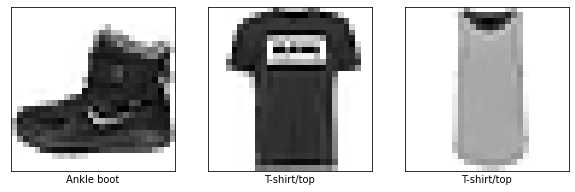

In [ ]:
fig = plt.figure(figsize=(10,10))
print("Train Images")
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_mapping[y_train[i]])

Test Images


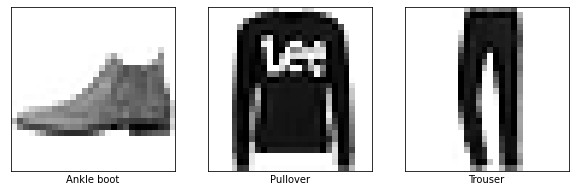

In [ ]:
fig = plt.figure(figsize=(10,10))
print("Test Images")
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_mapping[y_test[i]])

In [ ]:
# data normalization and preparation
X_train /= 255.
X_test /= 255.

y_train = to_categorical(y_train,)
y_test = to_categorical(y_test)

IMG_ROWS, IMG_COLS = 28, 28
if backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, IMG_ROWS, IMG_COLS)
    X_test = x_test.reshape(X_test.shape[0], 1, IMG_ROWS, IMG_COLS)
    input_shape = (1, IMG_ROWS, IMG_COLS)
else:
    X_train = X_train.reshape(X_train.shape[0], IMG_ROWS, IMG_COLS, 1)
    X_test = X_test.reshape(X_test.shape[0], IMG_ROWS, IMG_COLS, 1)
    input_shape = (IMG_ROWS, IMG_COLS, 1)

In [ ]:
# define Hps:
my_hps = Hp()
hp_1 = my_hps.numrange(name='num_layers_conv',min=2,max=5)
hp_2 = my_hps.numrange(name='num_conv_filters', min=32, max=256)
hp_3 = my_hps.numrange(name='nodes_dense',min=10,max=200)
hp_4 = my_hps.numrange(name='lr',min=0.0001,max=0.01, type='log')

In [ ]:
# define keras model and return model history
def myfunc(hps, k):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding='same'))
    for layer in range(hps['num_layers_conv'][k]):
        model.add(Conv2D(hps['num_conv_filters'][k], (3, 3), activation='relu',padding='same'))
    model.add(BatchNormalization())    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(hps['nodes_dense'][k], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(hps['lr'][k]),metrics=['acc'])
    history = model.fit(x_train,y_train,epochs=3, batch_size=128,validation_data=(x_test,y_test))
    return model, history

In [ ]:
# run optimizer
demo = HpOptimization(my_hps, myfunc, ['val_acc','val_loss'], ['max','min'], num_trials=5, rounds=3, mode='p')
demo.run_opti()

For commercial use, you can obtain our API from https://rapidapi.com/aisara-technology-aisara-technology-default/api/aisara-hyperparameter-tuning
If you are a private user, set the mode parameter in HpOptimization class to "p".

Round-1:

  Run-1:
Epoch 1/3
469/469 [==============================] - 23s 50ms/step - loss: 0.4101 - acc: 0.8528 - val_loss: 0.3696 - val_acc: 0.8769
Epoch 2/3
469/469 [==============================] - 23s 49ms/step - loss: 0.2476 - acc: 0.9101 - val_loss: 0.2605 - val_acc: 0.9050
Epoch 3/3
469/469 [==============================] - 23s 49ms/step - loss: 0.1978 - acc: 0.9272 - val_loss: 0.2416 - val_acc: 0.9107

  Run-2:
Epoch 1/3
469/469 [==============================] - 12s 26ms/step - loss: 0.3948 - acc: 0.8582 - val_loss: 0.5839 - val_acc: 0.8862
Epoch 2/3
469/469 [==============================] - 12s 26ms/step - loss: 0.2403 - acc: 0.9133 - val_loss: 0.2347 - val_acc: 0.9183
Epoch 3/3
469/469 [==============================] - 12s 26ms/step - loss: 0.

In [ ]:
# optimization results in dataframe
print(demo.opti_results)

 num_layers_conv  num_conv_filters  nodes_dense        lr      loss       acc  val_loss  val_acc    Round   model ID
               3               234           67  0.001000  0.197828  0.927183  0.241566   0.9107  Round_1  model_1_1
               4                99          143  0.000158  0.184091  0.933100  0.210904   0.9228  Round_1  model_1_2
               4               144          181  0.002512  0.236200  0.913717  0.395997   0.8801  Round_1  model_1_3
               2                54          105  0.000398  0.181810  0.932083  0.232517   0.9169  Round_1  model_1_4
               5               189           29  0.006310  1.309202  0.442933  1.182737   0.4892  Round_1  model_1_5
               4               151          143  0.000165  0.171800  0.936683  0.216180   0.9230  Round_2  model_2_1
               4                47          165  0.000152  0.211199  0.922967  0.234451   0.9146  Round_2  model_2_2
               4               125           98  0.000158  0.191

In [ ]:
# visualize optimization results
demo.plot_opti_results()

In [ ]:
# visualize hyperparameters search space
demo.plot_search_space()

In [ ]:
# best model hyperparameters
print(demo.best_model_hps)

 num_layers_conv  num_conv_filters  nodes_dense        lr
               4               152          170  0.000165


In [ ]:
# loading the best model
best = demo.best_model
best.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 28, 28, 152)       43928     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 28, 28, 152)       208088    
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 28, 28, 152)       208088    
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 28, 28, 152)       208088    
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 152)       608       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 152)     